In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Markdown, display
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_text
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [2]:
colonnes_a_supprimer = ['CODTYPPRS', 'CRTOD_CMT_PRO_IND_0209','INDPARDCD','CRTOP_AG_IND_0038', 'CRTOP_IND_0038', 'CRTOU_CCT_PRO_IND_0209', 'DATCREENT', 'DATRLNORG', 'RATIO1', 'RATIO3', 'TOP_PRO_ACTIF', 'IND_ACTIF', 'IND_PER_PM', 'CODCMNIEE', 'CODPAY_NAISSANCE', 'CODPAY_NATIONALITE', 'CODPAY_RESIDENCE', 'CODSEXPRS', 'secteur_activite', 'secteur_activite_bis' ]
samples = samples = pd.read_excel('../data/samples.xlsx', sheet_name=None)
train = samples[list(samples.keys())[0]]
train = train.drop(columns=colonnes_a_supprimer)
test = samples[list(samples.keys())[1]]
test = test.drop(columns=colonnes_a_supprimer)
oot = samples[list(samples.keys())[2]]
oot = oot.drop(columns=colonnes_a_supprimer)
sample = pd.concat([train, test, oot], ignore_index=True)
sample['datdelhis'] = sample['datdelhis'] % 100
sample['datdelhis'] = sample['datdelhis'].astype(str)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


def discretize_feature_based_on_tree(feature, n_bins):
    """
    Discretizes a feature based on a decision tree classifier.
    
    Parameters:
    - feature: str, the name of the feature to discretize.
    - n_bins: int, the number of leaf nodes in the decision tree classifier.
    """
    target = 'DDefaut_NDB'
    
    # Extract feature and target data from the train dataset
    X = train[[feature]].values
    y = train[target].values

    # Initialize the DecisionTreeClassifier
    clf = DecisionTreeClassifier(
        max_leaf_nodes=n_bins,
        random_state=42,
        min_samples_split=0.05,
    )
    
    # Fit the model
    clf.fit(X, y)

    # Get sorted thresholds where splits were made
    thresholds = np.sort(clf.tree_.threshold[clf.tree_.threshold != -2])
    
    def assign_class(value):
        """
        Assigns a class to a value based on thresholds from the decision tree.
        """
        for i, threshold in enumerate(thresholds):
            if value <= threshold:
                return i
        return len(thresholds)

    # Apply discretization to the train data
    discretized_column = train[feature].apply(assign_class)
    discretized_column_name = f"{feature}_discretized"
    train[discretized_column_name] = discretized_column

    discretized_column = sample[feature].apply(assign_class)
    discretized_column_name = f"{feature}_discretized"
    sample[discretized_column_name] = discretized_column

    print(f"Thresholds for '{feature}': {thresholds}")
    print(export_text(clf, feature_names=[feature]))

    return discretized_column_name

Thresholds for 'CRTOC_IND_0015': [ 3.5 27.5]
|--- CRTOC_IND_0015 <= 27.50
|   |--- CRTOC_IND_0015 <= 3.50
|   |   |--- class: 0
|   |--- CRTOC_IND_0015 >  3.50
|   |   |--- class: 0
|--- CRTOC_IND_0015 >  27.50
|   |--- class: 0



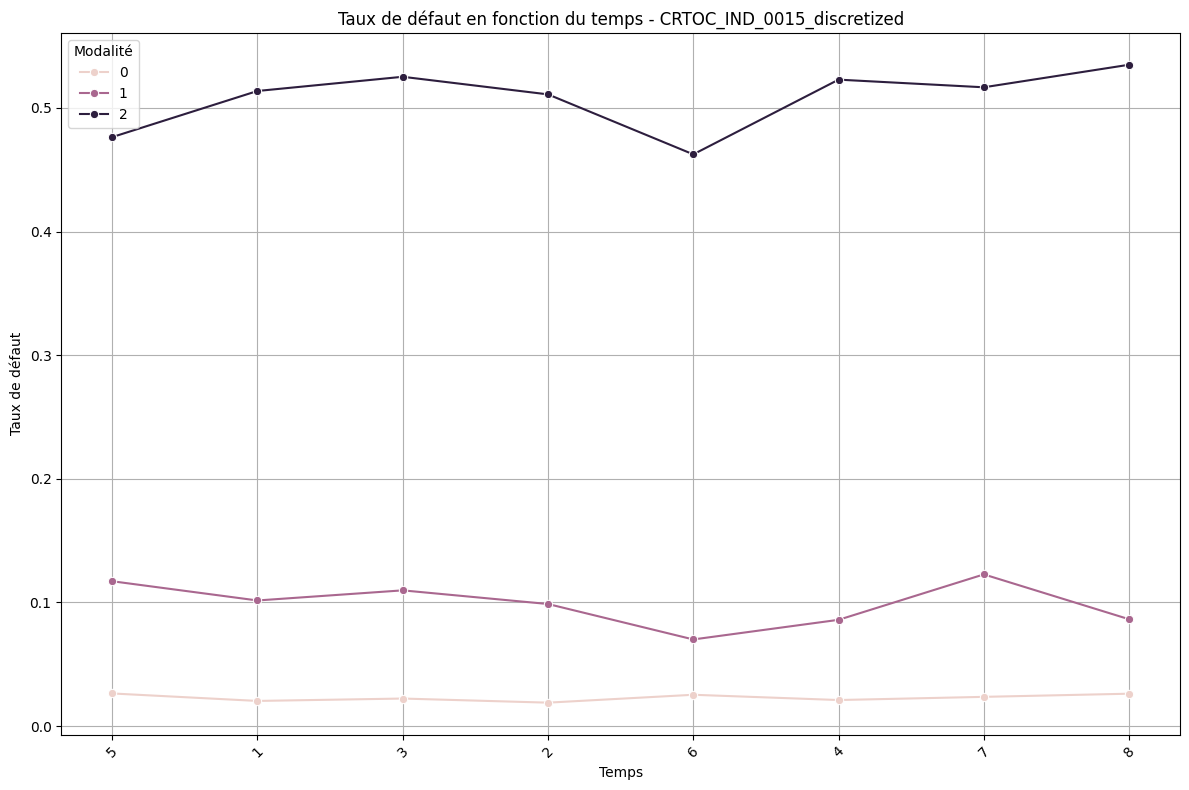

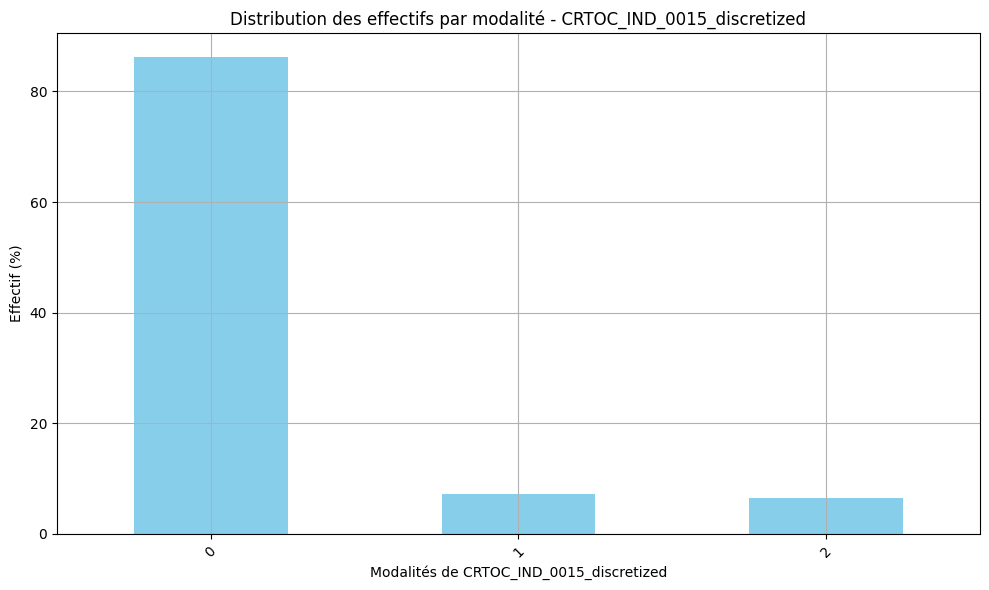

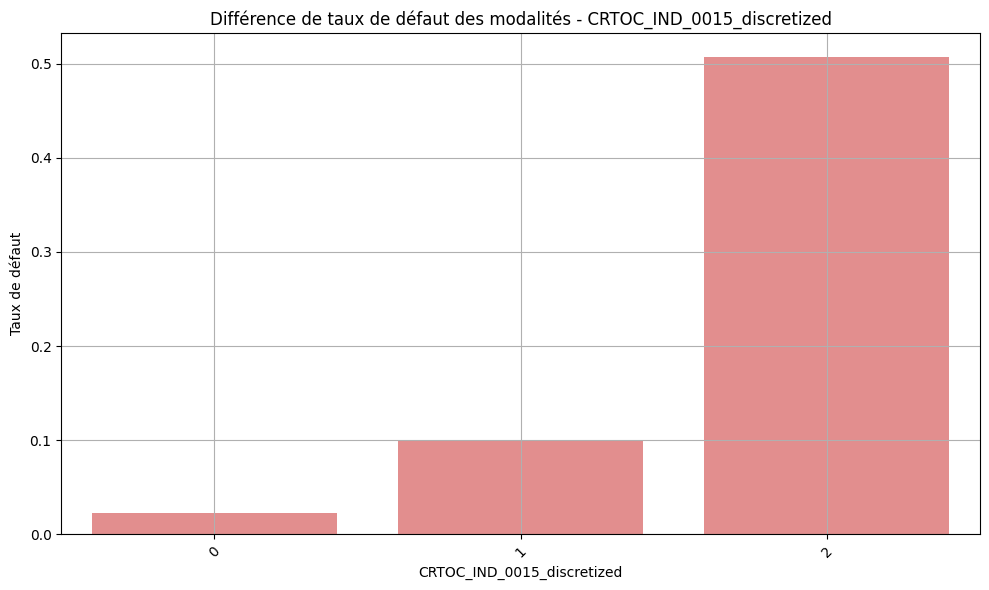

Thresholds for 'CRTOC_AG_LIGDEB_2T_IND_0015': [-403533.5]
|--- CRTOC_AG_LIGDEB_2T_IND_0015 <= -403533.50
|   |--- class: 0
|--- CRTOC_AG_LIGDEB_2T_IND_0015 >  -403533.50
|   |--- class: 0



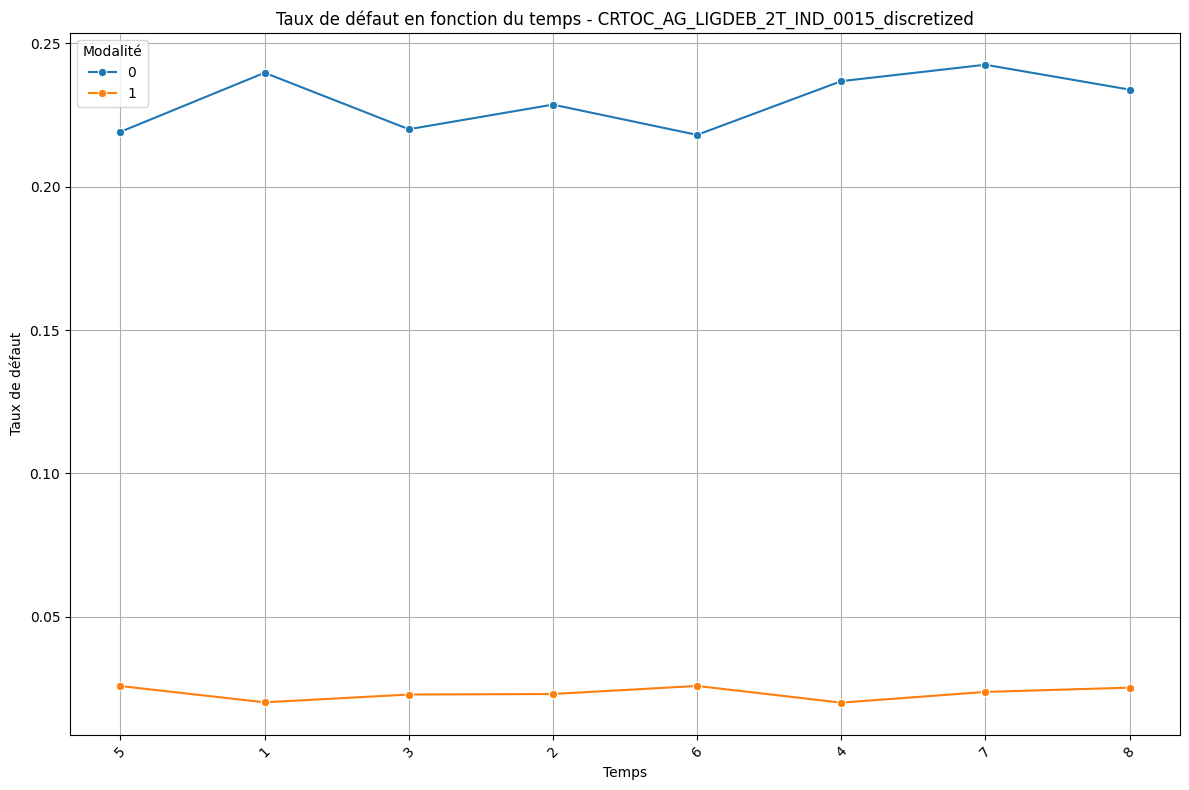

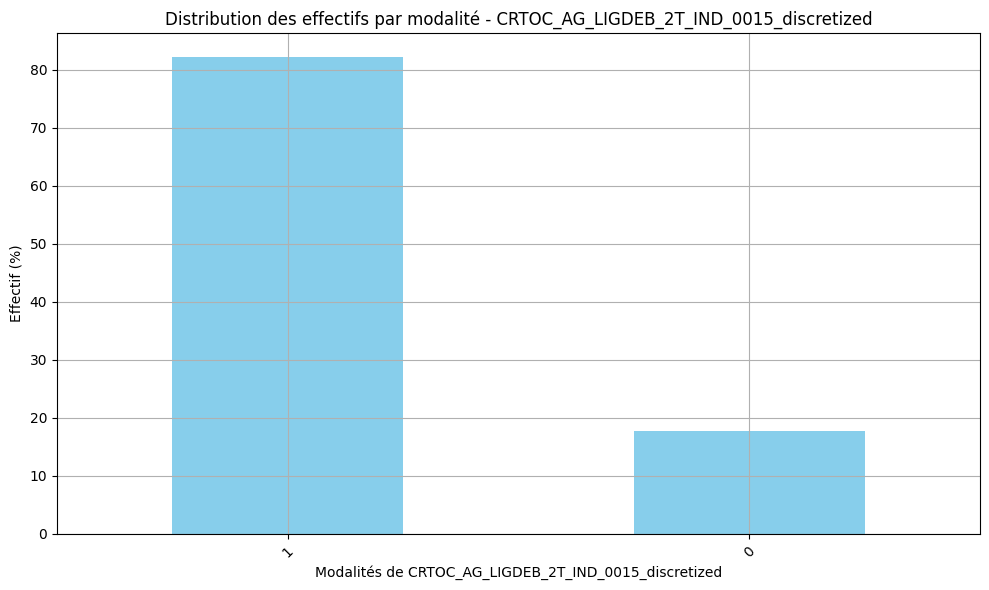

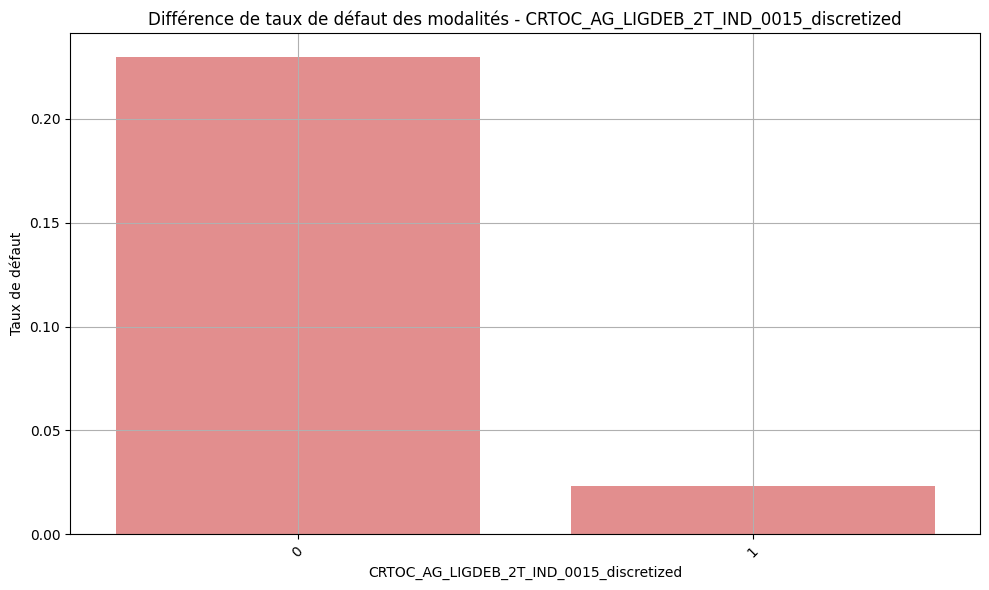

Thresholds for 'CRTOC_IND_0164': [-3950.]
|--- CRTOC_IND_0164 <= -3950.00
|   |--- class: 0
|--- CRTOC_IND_0164 >  -3950.00
|   |--- class: 0



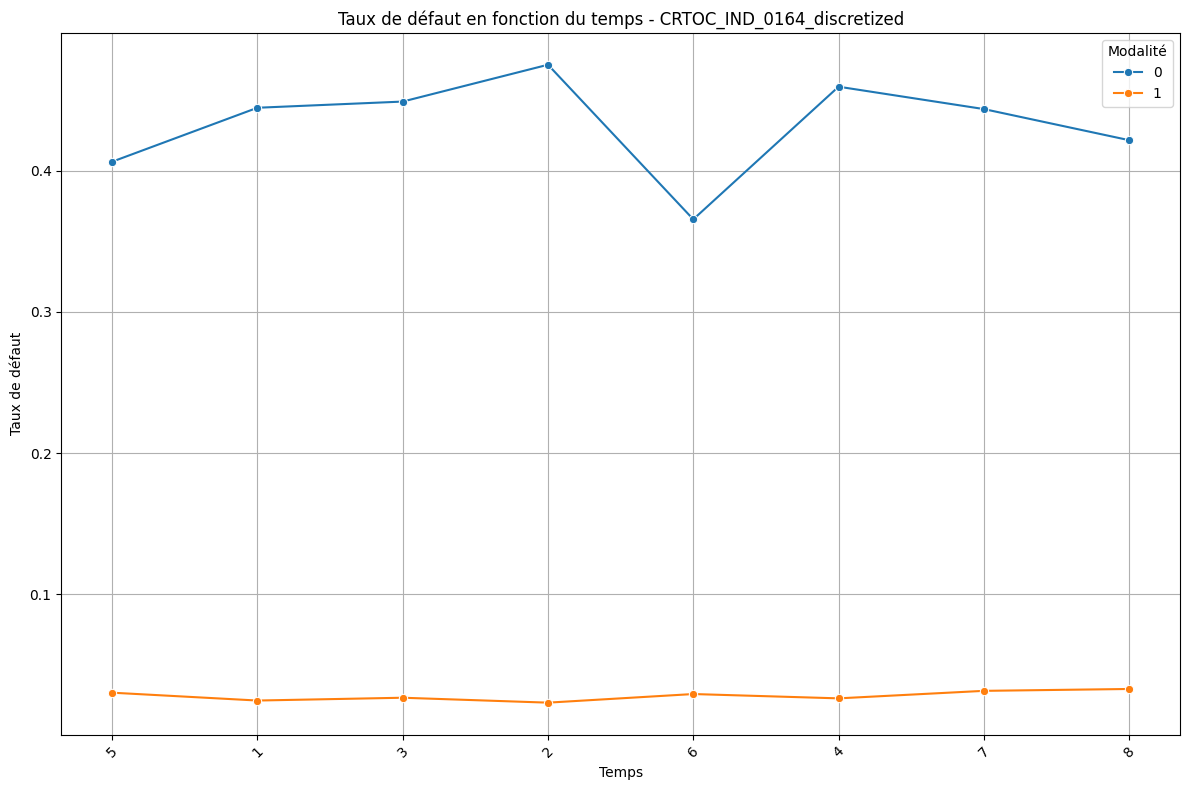

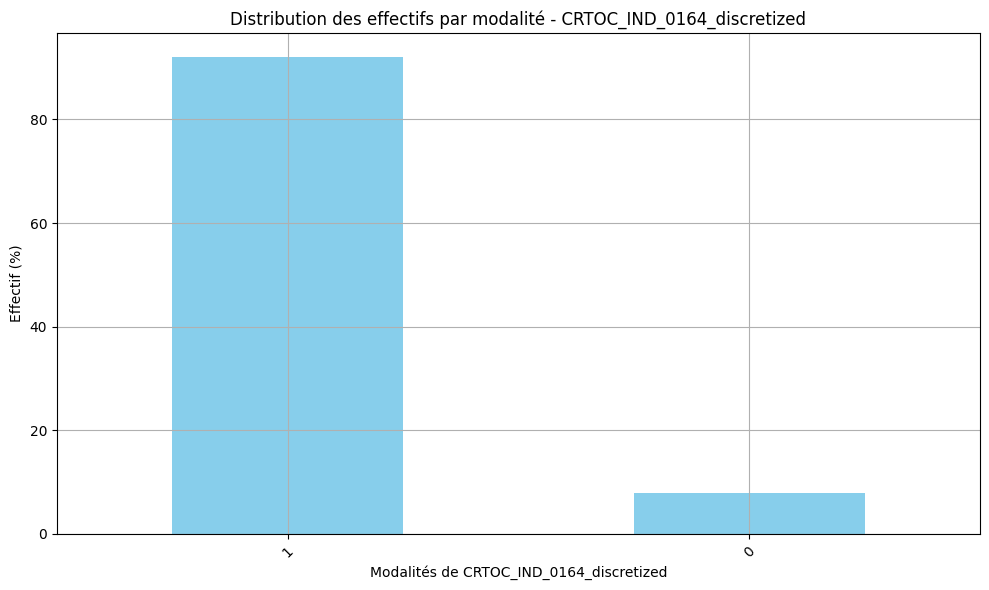

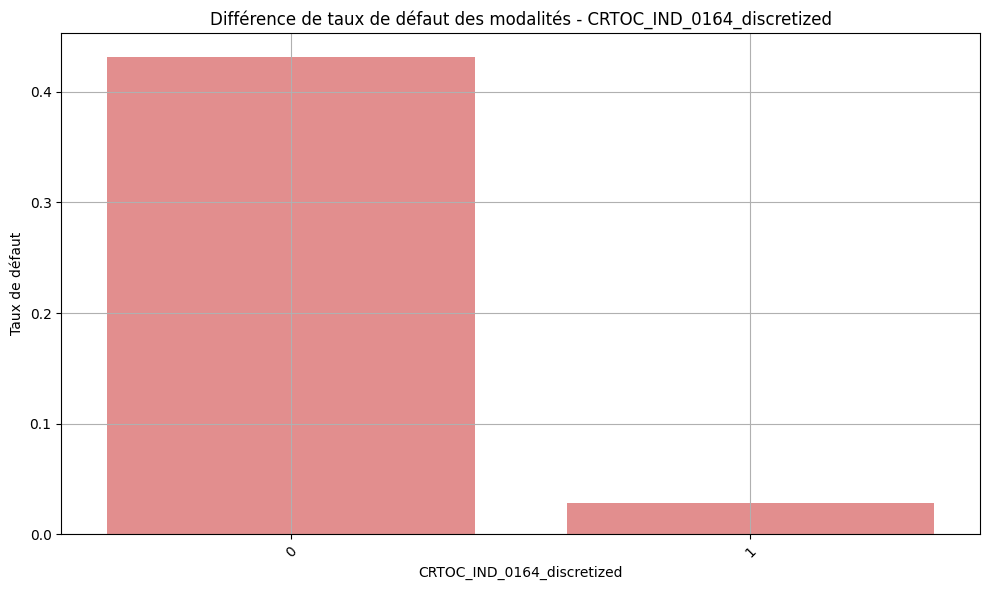

Thresholds for 'CRTOC_AG_NBJCRE_2T_IND_0009': [ 11.5 134.5 180.5]
|--- CRTOC_AG_NBJCRE_2T_IND_0009 <= 11.50
|   |--- class: 0
|--- CRTOC_AG_NBJCRE_2T_IND_0009 >  11.50
|   |--- CRTOC_AG_NBJCRE_2T_IND_0009 <= 134.50
|   |   |--- class: 0
|   |--- CRTOC_AG_NBJCRE_2T_IND_0009 >  134.50
|   |   |--- CRTOC_AG_NBJCRE_2T_IND_0009 <= 180.50
|   |   |   |--- class: 0
|   |   |--- CRTOC_AG_NBJCRE_2T_IND_0009 >  180.50
|   |   |   |--- class: 0



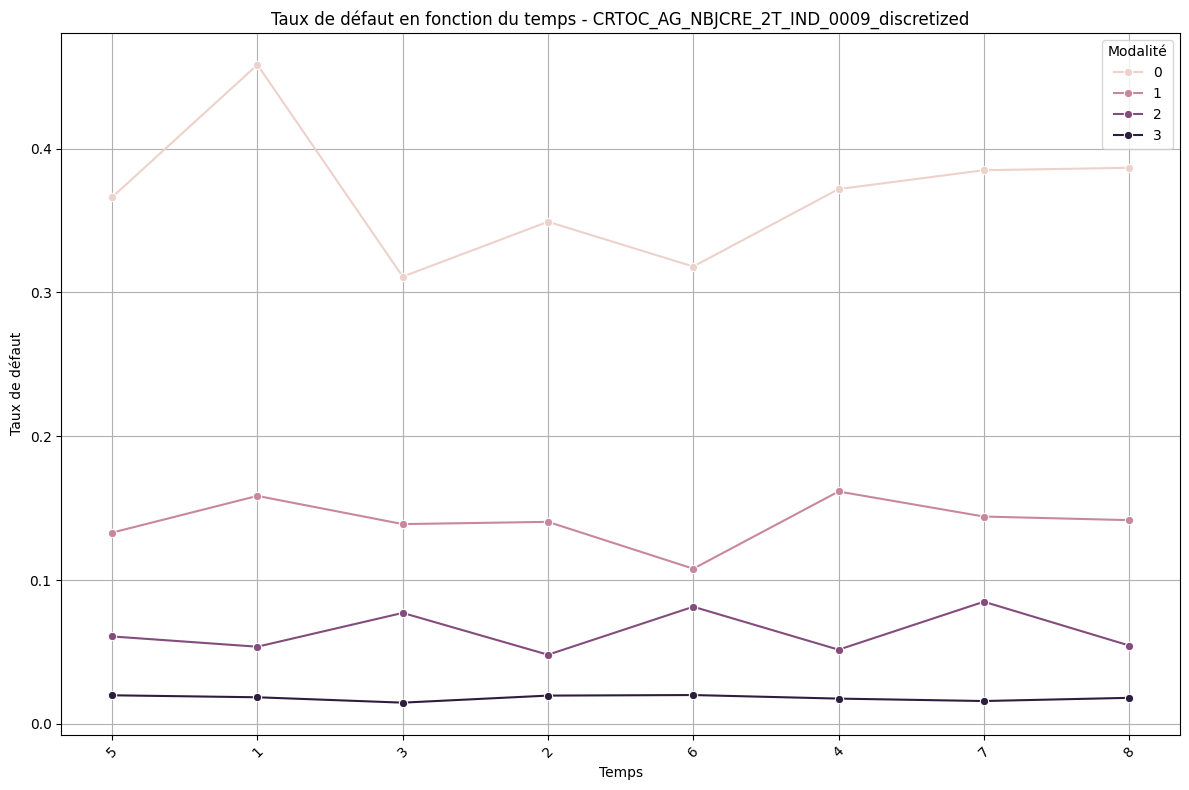

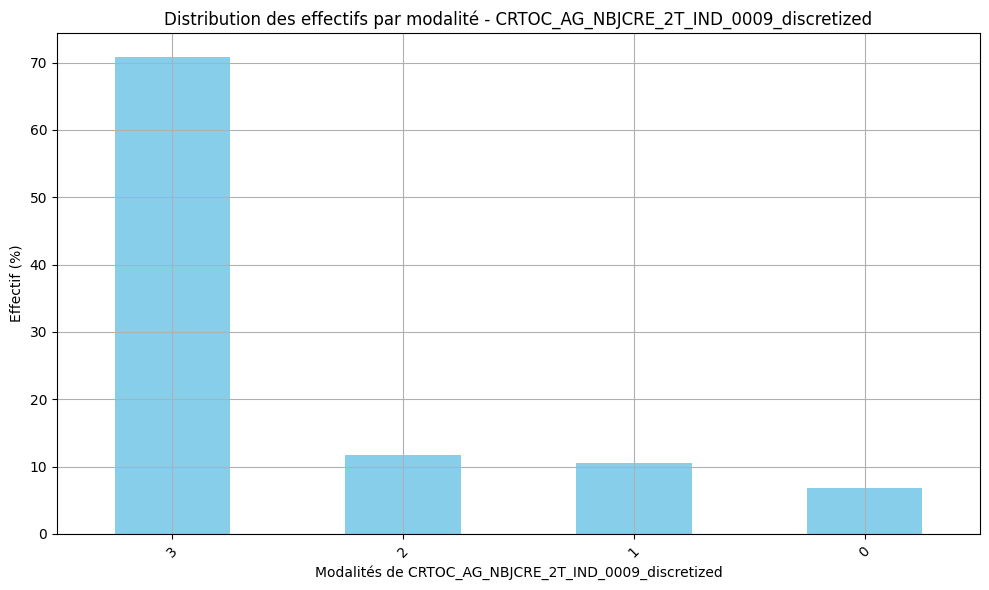

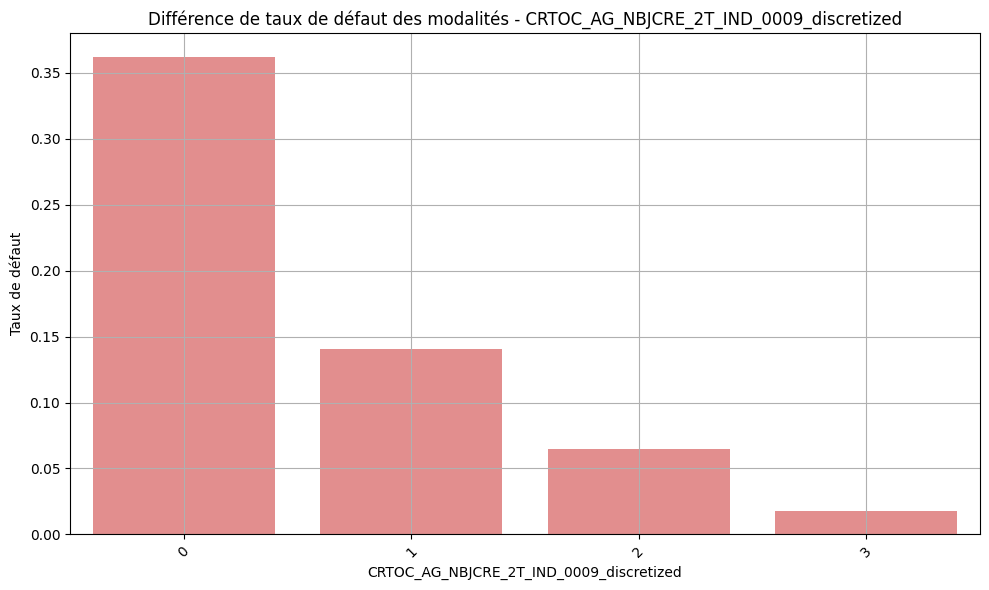

Thresholds for 'CRTOC_AG_MVTAFF_2T_IND_0010': [  14156. 1811925.]
|--- CRTOC_AG_MVTAFF_2T_IND_0010 <= 14156.00
|   |--- class: 0
|--- CRTOC_AG_MVTAFF_2T_IND_0010 >  14156.00
|   |--- CRTOC_AG_MVTAFF_2T_IND_0010 <= 1811925.00
|   |   |--- class: 0
|   |--- CRTOC_AG_MVTAFF_2T_IND_0010 >  1811925.00
|   |   |--- class: 0



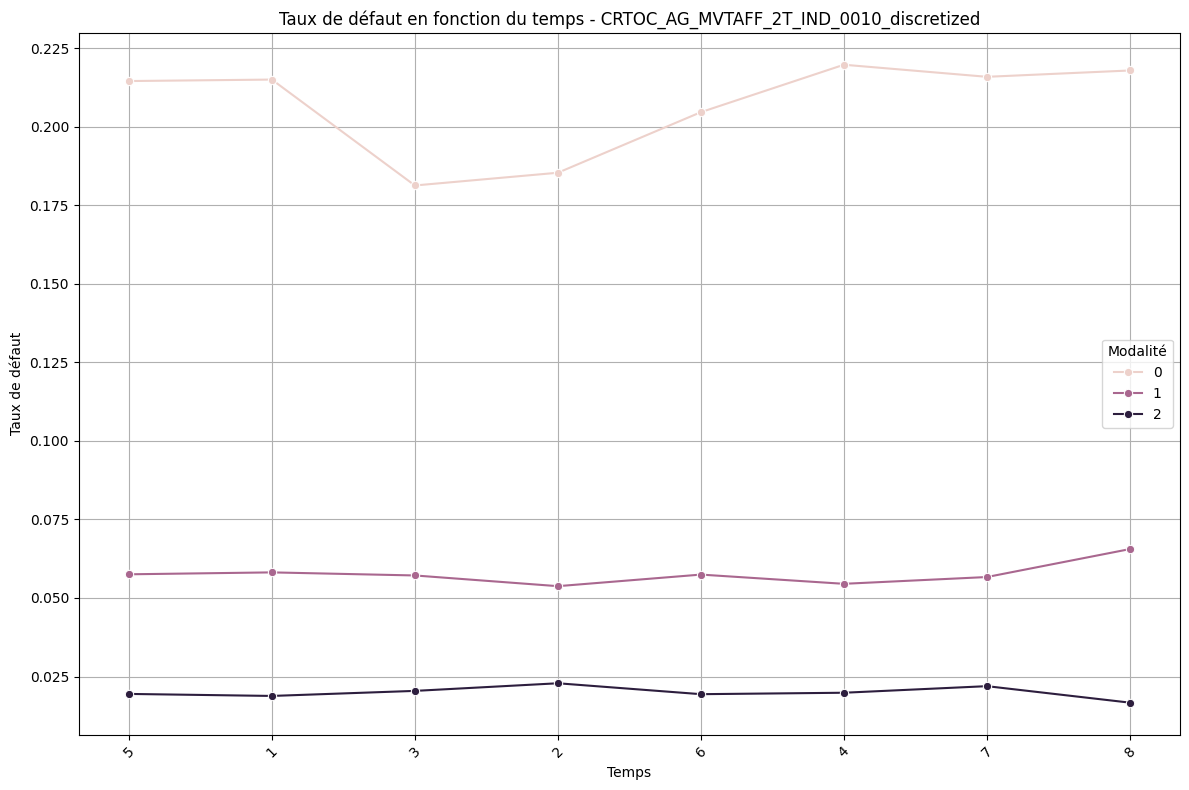

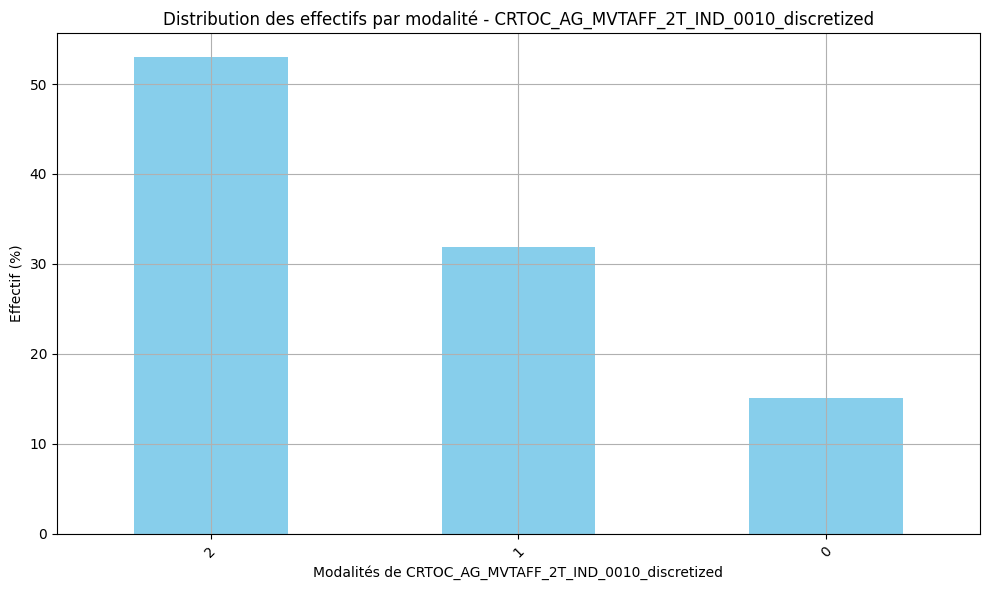

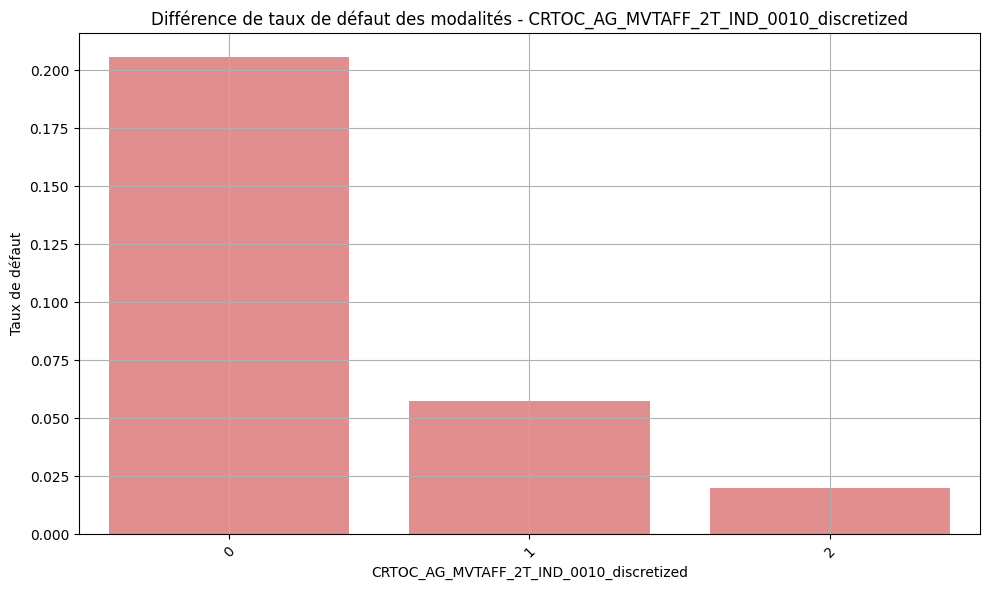

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_cols_after_wallis_pearson = [
    'CRTOC_IND_0015', 'CRTOC_AG_LIGDEB_2T_IND_0015', 'CRTOC_IND_0164',
    'CRTOC_AG_NBJCRE_2T_IND_0009', 'CRTOC_AG_MVTAFF_2T_IND_0010'
]
n_bins_list = [3, 2, 2, 4, 3]

# Assuming 'sample' is the DataFrame already loaded in your environment.
# Ensure the function 'discretize_feature_based_on_tree' is properly defined.
for i in range(len(n_bins_list)):
    # Discretize the feature based on the tree method
    discretized_column_name = discretize_feature_based_on_tree(
        quantitative_cols_after_wallis_pearson[i], n_bins_list[i]
    )
    
    # Calculate the mean default rate for each discretized class
    taux_defaut = sample.groupby(discretized_column_name)["DDefaut_NDB"].mean().sort_values()

    # Plot the default rate over time for each discretized group
    plt.figure(figsize=(12, 8))
    sns.lineplot(x="datdelhis", y="DDefaut_NDB", hue=discretized_column_name, data=sample, ci=None, marker='o')
    plt.title(f"Taux de défaut en fonction du temps - {discretized_column_name}")
    plt.xlabel("Temps")
    plt.ylabel("Taux de défaut")
    plt.grid(True)
    plt.legend(title="Modalité")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Check stability by effect count (at least 5% per modality)
    modalites_count = sample[discretized_column_name].value_counts(normalize=True) * 100

    # Plot the distribution of counts by modality
    plt.figure(figsize=(10, 6))
    modalites_count.plot(kind="bar", color="skyblue")
    plt.title(f"Distribution des effectifs par modalité - {discretized_column_name}")
    plt.xlabel(f"Modalités de {discretized_column_name}")
    plt.ylabel("Effectif (%)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot the default rate difference between modalities for separation check
    plt.figure(figsize=(10, 6))
    sns.barplot(x=taux_defaut.index, y=taux_defaut.values, color="lightcoral")
    plt.title(f"Différence de taux de défaut des modalités - {discretized_column_name}")
    plt.xlabel(f"{discretized_column_name}")
    plt.ylabel("Taux de défaut")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [6]:
sample.columns

Index(['id_client', 'DDefaut_NDB', 'datdelhis', 'AGEPRS', 'ANCIENNETE', 'CODETAJUR', 'CODITDBDF_PRO', 'CODNAF2', 'CRTAD_AG_MVTAFF_IND_0010', 'CRTAD_AG_NBECR_A', 'CRTAD_AG_NBECR_B', 'CRTAD_AG_NBJDE_BA', 'CRTAD_AG_NBJDE_BB', 'CRTAD_AG_NBJDE_BC', 'CRTAD_AG_SOLDE_IND_0009', 'CRTAD_AG_SOLDE_T', 'CRTAD_AG_SOLDE_T1', 'CRTAD_AG_SOLDE_T2', 'CRTAD_AG_SOLDE_T3', 'CRTAD_AG_SOLDE_T4', 'CRTAD_IND_0015', 'CRTAD_IND_0038', 'CRTAD_IND_0062', 'CRTAD_IND_0205', 'CRTAE_AG_SLDEPA', 'CRTAR_IND_0036', 'CRTOC_AG_LIGCRE_2T_IND_0009', 'CRTOC_AG_LIGCRE_IND_0009', 'CRTOC_AG_LIGDEB_2T_IND_0015', 'CRTOC_AG_LIGDEB_IND_0015', 'CRTOC_AG_MVTAFF_2T_IND_0010', 'CRTOC_AG_MVTAFF_IND_0010', 'CRTOC_AG_NBJCRE_2T_IND_0009', 'CRTOC_AG_NBJDEB_2T_IND_0015', 'CRTOC_AG_NBJDEB_IND_0015', 'CRTOC_IND_0010', 'CRTOC_IND_0015', 'CRTOC_IND_0164', 'CRTOC_IND_0301', 'CRTOC_MOY_MVTAFF_IND_0010', 'CRTOC_SLD_MOY', 'CRTOD_CMT_IND_0036', 'MINSOLDE_PAR', 'NBECR_PAR', 'CRTAD_IND_0042', 'CODACVPRO', 'DATCREPRSENT', 'CRTOC_IND_0015_discretized',
   

In [7]:
quanti_discretized_sample = sample[['id_client', 'datdelhis', 'CRTOC_AG_MVTAFF_2T_IND_0010_discretized', 'CRTOC_AG_NBJCRE_2T_IND_0009_discretized', 'CRTOC_IND_0164_discretized', 'CRTOC_AG_LIGDEB_2T_IND_0015_discretized', 'CRTOC_IND_0015_discretized']]
quanti_discretized_sample = quanti_discretized_sample.rename(columns={'CRTOC_AG_MVTAFF_2T_IND_0010_discretized': 'CRTOC_AG_MVTAFF_2T_IND_0010', 
                                                                      'CRTOC_AG_NBJCRE_2T_IND_0009_discretized': 'CRTOC_AG_NBJCRE_2T_IND_0009', 
                                                                      'CRTOC_IND_0164_discretized':'CRTOC_IND_0164', 
                                                                      'CRTOC_AG_LIGDEB_2T_IND_0015_discretized':'CRTOC_AG_LIGDEB_2T_IND_0015', 
                                                                      'CRTOC_IND_0015_discretized':'CRTOC_IND_0015'})
quanti_discretized_sample.head(100)

,id_client,datdelhis,CRTOC_AG_MVTAFF_2T_IND_0010,CRTOC_AG_NBJCRE_2T_IND_0009,CRTOC_IND_0164,CRTOC_AG_LIGDEB_2T_IND_0015,CRTOC_IND_0015
0,6002959649,5,2,3,1,1,0
1,3235248704,1,1,3,1,1,0
2,7995781136,3,1,3,1,1,0
3,2112452922,5,2,3,1,1,0
4,3540500580,2,2,3,1,1,0
5,8390775990,6,2,3,1,1,0
6,1528496440,3,0,3,1,1,0
7,3019876475,2,2,3,1,1,0
8,1500330744,3,2,2,1,0,0
9,3549117482,2,2,3,1,1,0


In [8]:
quanti_discretized_sample.to_excel('../data/quanti_discretized_sample.xlsx', index=True)